#0.Import library and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataMAC = pd.read_csv("/content/laptopspiderMAC_Apple.csv",encoding_errors='ignore')
data0 = pd.read_csv("/content/laptopspider_Acer.csv")
data1 = pd.read_csv("/content/laptopspider_ASUS.csv")
data2 = pd.read_csv("/content/laptopspider_Dell.csv")
data3 = pd.read_csv("/content/laptopspider_HP.csv")
data4 = pd.read_csv("/content/laptopspider_lenovo.csv")

#1.Concate data and rearrange index

In [ ]:
# Concating all file of data:
data_total = pd.concat([data0,data1, data2,data3, data4,dataMAC])

In [ ]:
data_total.head(5)

,brand,model,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,graphics_card_description,OpSys,weight,color,No_reviews,ratings,price,link_item
0,Acer,A315-24P-R7VH,15.6 Inches,1920 x 1080 pixels,ryzen_3,4.1 GHz,8 GB,128 GB,AMD Radeon Graphics,Integrated,Windows 11 S,3.92 pounds,Silver,548 ratings,4.3,$292.49,https://www.amazon.com/A315-24P-R7VH-Display-Q...
1,Acer,Aspire 5 A515-57,15.6 Inches,1920x1080,core_i7,1.7 GHz,32 GB,1 TB,Intel Iris Xe Graphics,Integrated,Windows 11 Pro,3.9 pounds,NaN,NaN,NaN,$759.00,https://www.amazon.com/acer-Business-Fingerpri...
2,Acer,Acer Aspire 3,15.6 Inches,1920 x 1080 pixels,ryzen_5,4.3 GHz,8 GB,1 TB,AMD Radeon Graphics,Integrated,Windows 11 Home,3.92 pounds,Steam Blue,490 ratings,4.1,$669.99,https://www.amazon.com/acer-Aspire-Touchscreen...
3,Acer,AN515-57,15.6 Inches,1920 x 1080 pixels,core_i7_family,3 GHz,32 GB,2 TB,Nvidia RTX 3060 6GB,Dedicated,Windows 11 Pro,5.51 pounds,Black,1 rating,5.0,"$1,869.00",https://www.amazon.com/i7-12700H-14-Core-Thund...
4,acer,Nitro 5,17.3 Inches,1920 x 1080 pixels,core_i5,2.5 GHz,32 GB,1 TB,NVIDIA GeForce RTX 3050,Dedicated,Windows 11 Home,9.98 pounds,Black,3 ratings,4.0,"$1,159.00",https://www.amazon.com/Acer-i5-12500H-GeForce-...


In [ ]:
data_total.to_csv("data_total.csv")

In [ ]:
# Rearrange index:
data_total.index = range(0,data_total.index.size)

#2 Missing value and duplicate value and lower all the value:
- Drop colmun: "link_item" and "model"
- Lowercase all the value
- Eliminate missing value
- Eliminate duplicate value

In [ ]:
# Drop colmun: "link_item" and "model"
data=data_total.drop(["link_item","model","No_reviews","ratings"],axis=1)

In [ ]:
# lowercase all the table function
def lower(x):
  if isinstance(x,str):
    x = x.lower()
    return x
  return x

In [ ]:
# apply lowercase
data = data.applymap(lower)

In [ ]:
# drop duplicates
data = data.drop_duplicates()

In [ ]:
#drop row having missing value
data = data.dropna()

In [ ]:
# drop error row
data = data.drop(index = 4033)
data = data.drop(index = 2866)

<Axes: >

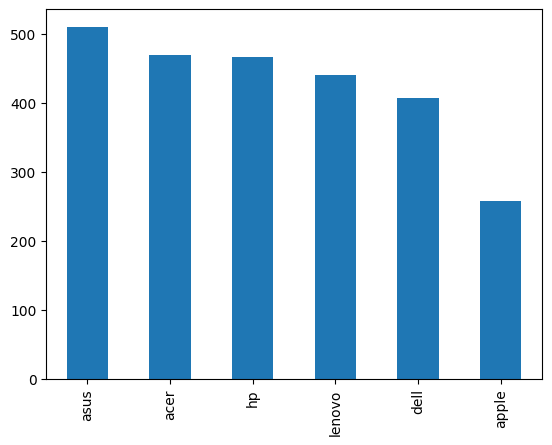

In [ ]:
data.loc[:,"brand"].value_counts().plot(kind = "bar")

#3.Transforms data

##3.1 Price transforms
- Drop $ sign
- Drop , sign
- Change data type from string type to float


In [ ]:
def price_trasnforms(x):
  if len(x) > 3:
    x = x.strip()
    x = x.replace("$", "")
    x = x.replace(",", "")
    return float(x)
  return None

In [ ]:
#transforms price
data.loc[:,"price"] = data.loc[:,"price"].map(price_trasnforms)

#drop Nan Row after transformation
data.loc[:,"price"] = data.loc[:,"price"].dropna()

<ipython-input-15-fd028bd7f7ee>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,"price"] = data.loc[:,"price"].map(price_trasnforms)


<Axes: xlabel='price', ylabel='Count'>

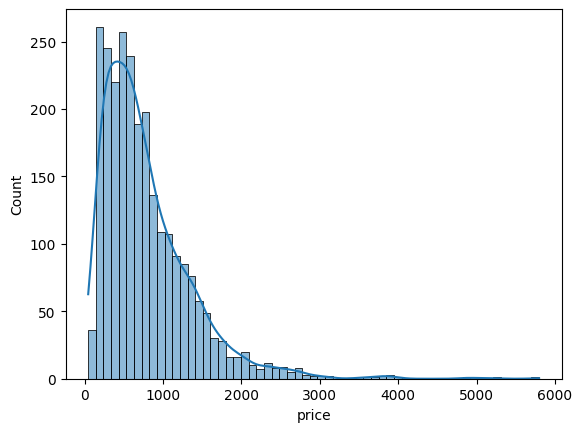

In [ ]:
sns.histplot(x = data["price"],kde =True)

##3.2 Transform Screen_Size, Screen_resolution , cpu_speed transforms ram , cpu

In [ ]:
# Transforms screen size:
data["screen_size"]=data["screen_size"].astype("str")
data.drop(data[data['screen_size'].str.contains("centimeters")].index, inplace=True)
data["screen_size"]=data["screen_size"].str.replace("-inch","")
data["screen_size"]=data["screen_size"].str.replace("inches","").astype("float")

In [ ]:
#screen resolution
data.drop(data[data['screen_resolution'].str.contains("resolution")].index, inplace=True)
data.loc[data['screen_resolution'].str.contains("by"),'screen_resolution']="1920x1200"
data["screen_resolution"]=data["screen_resolution"].str.replace("*","x")
data.loc[data['screen_resolution'].str.contains("non-touch diplay"),'screen_resolution']="1920x1080"
data.loc[data['screen_resolution'].str.contains("mp"),'screen_resolution']="1920x1080"
data.loc[data['screen_resolution'].str.contains("1080 non-touch"),'screen_resolution']="1920x1080"
data.loc[data['screen_resolution'].str.contains("768 non-touch"),'screen_resolution']="1366x768"
data.loc[data['screen_resolution'].str.contains("full hd ips"),'screen_resolution']="1920x1080"



data["screen_resolution"]=data["screen_resolution"].str.replace("pixels","")
data["screen_resolution"]=data["screen_resolution"].str.replace("pixles","")
data["screen_resolution"]=data["screen_resolution"].str.replace(")","")
data["screen_resolution"]=data["screen_resolution"].str.replace(" ","")
data.drop(data[~data['screen_resolution'].str.contains("x")].index, inplace=True)


# Screen resolution change to multiply and compute ppi
temp=data['screen_resolution'].str.split('x',n=1,expand=True)
screen_w=temp[0].astype('int')
screen_h=temp[1].astype('int')
data['screen_resolution']=screen_h*screen_w
data['ppi']=((screen_w**2+screen_h**2)**0.5)/data['screen_size']

<ipython-input-18-52f280770646>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["screen_resolution"]=data["screen_resolution"].str.replace("*","x")
<ipython-input-18-52f280770646>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["screen_resolution"]=data["screen_resolution"].str.replace(")","")


<Axes: >

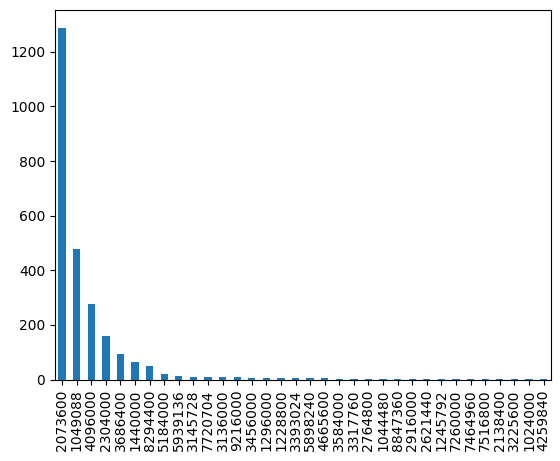

In [ ]:
data["screen_resolution"].value_counts().plot(kind = "bar")

<Axes: xlabel='ppi', ylabel='Count'>

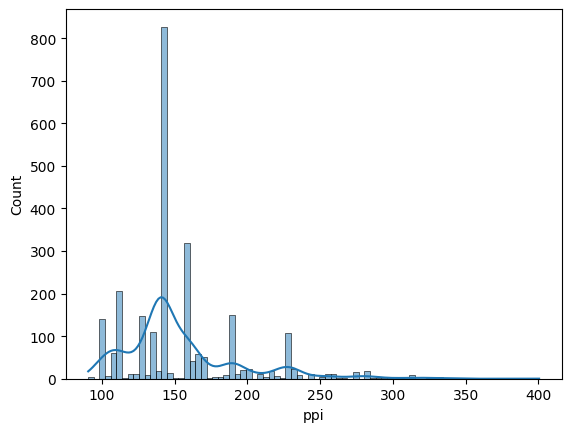

In [ ]:
sns.histplot(x = data["ppi"],kde =True)

In [ ]:
def cpu_speed_process(x):
  if x == "depend" or x == "0.1":
    return "3.5"
  if x == "32 hertz":
    return None
  if x == '3.1, 2.7 ghz':
    return '2.7'

  if x == "2.9ghz":
    return '2.9'

  return x.split()[0]

In [ ]:
#cpu transforms:
data["cpu_speed"]=data["cpu_speed"].astype("str")
data["cpu_speed"]=data["cpu_speed"].apply(cpu_speed_process)
data["cpu_speed"]=data["cpu_speed"].astype("float")
data = data.dropna()

In [ ]:
def ram_process(x):
  return float(x.split()[0])


data["ram"]=data["ram"].astype("str")
data.drop(data[data['ram'].str.contains("tb")].index, inplace=True)
data.drop(data[data['ram'].str.contains("mb")].index, inplace=True)
data.drop(data[data['ram'].str.contains("apple m1 pro chip")].index, inplace=True)
data.drop(data[data['ram'].str.contains("apple m3 pro chip")].index, inplace=True)
data.drop(data[data['ram'].str.contains("apple m2 pro chip")].index, inplace=True)
data.loc[:,'ram'] = data.loc[:,'ram'].apply(ram_process).astype("float")




<ipython-input-23-a584594c539e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ram"]=data["ram"].astype("str")
<ipython-input-23-a584594c539e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['ram'].str.contains("tb")].index, inplace=True)
<ipython-input-23-a584594c539e>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newv

In [ ]:
data

,brand,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,graphics_card_description,OpSys,weight,color,price,ppi
0,acer,15.6,2073600,ryzen_3,4.1,8.0,128 gb,amd radeon graphics,integrated,windows 11 s,3.92 pounds,silver,292.49,141.211998
2,acer,15.6,2073600,ryzen_5,4.3,8.0,1 tb,amd radeon graphics,integrated,windows 11 home,3.92 pounds,steam blue,669.99,141.211998
3,acer,15.6,2073600,core_i7_family,3.0,32.0,2 tb,nvidia rtx 3060 6gb,dedicated,windows 11 pro,5.51 pounds,black,1869.00,141.211998
4,acer,17.3,2073600,core_i5,2.5,32.0,1 tb,nvidia geforce rtx 3050,dedicated,windows 11 home,9.98 pounds,black,1159.00,127.335675
5,acer,14.0,2073600,celeron,1.6,4.0,32 gb,intel hd graphics,integrated,windows 10,3.42 pounds,silver,293.00,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,apple,15.0,4096000,m2,3.5,8.0,512 gb,apple m2 10-core gpu,integrated,mac os,6.35 pounds,silver,1439.95,201.258264
5549,apple,13.0,1049088,core i5,1.6,4.0,128,intel hd graphics 6000,integrated,os x 10.10 yosemite,5 pounds,silver,500.00,120.545604
5551,apple,13.0,4096000,core i5,2.4,8.0,512 gb,intel iris plus graphics 655,integrated,macos 10.14 mojave,3 pounds,space gray,578.69,232.221074
5554,apple,11.6,1049088,core i5,2.7,4.0,128 gb,intel hd graphics 5000,integrated,mac os,1.1 pounds,silver,209.99,135.094211


In [ ]:
def cpu_transforms(x):
  count = data.loc[:,"cpu"].value_counts()
  if count[x] >= 12:
    return x
  else:
    return "other"

In [ ]:
data["cpu"]=data["cpu"].str.lower().astype("str")
data.loc[data['cpu'].str.contains("ryzen_9"),"cpu"]="amd_9"
data.loc[data['cpu'].str.contains("i9"),"cpu"]="intel_i9"
data.loc[data['cpu'].str.contains("i7"),"cpu"]="intel_i7"
data.loc[data['cpu'].str.contains("i5"),"cpu"]="intel_i5"
data.loc[data['cpu'].str.contains("i3"),"cpu"]="intel_i3"
data.loc[data['cpu'].str.contains("ryzen_7"),"cpu"]="amd_7"
data.loc[data['cpu'].str.contains("ryzen 7"),"cpu"]="amd_7"
data.loc[data['cpu'].str.contains("ryzen_5"),"cpu"]="amd_5"
data.loc[data['cpu'].str.contains("ryzen 5"),"cpu"]="amd_5"
data.loc[data['cpu'].str.contains("ryzen_3"),"cpu"]="amd_3"


data.loc[data['cpu'].str.contains("celeron"),"cpu"]="intel_celeron"
data.loc[data['cpu'].str.contains("snapdragon"),"cpu"]="snapdragon"
data.loc[data['cpu'].str.contains("xeon"),"cpu"]="intel_xeon"
data.loc[data['cpu'].str.contains("a_series"),"cpu"]="amd_a_series"
data.loc[data['cpu'].str.contains("pentium"),"cpu"]="intel_pentium"
data.loc[data['cpu'].str.contains("athlon"),"cpu"]="athlon"
data.loc[data['cpu'].str.contains("mtk_8121"),"cpu"]="mediatek_mt8121"
data.loc[data['cpu'].str.contains("core_m"),"cpu"]="intel_core"
data.loc[data['cpu'].str.contains("cortex"),"cpu"]="cortex"
data.loc[data['cpu'].str.contains("athlon"),"cpu"]="amd_athlon"
data.loc[data['cpu'].str.contains("m1"),"cpu"]="apple"
data.loc[data['cpu'].str.contains("m2"),"cpu"]="apple"
data.loc[data['cpu'].str.contains("m3"),"cpu"]="apple"

In [ ]:
#Apply Transforms
data["cpu"] = data["cpu"].apply(cpu_transforms)
#drop NaN row after transforms
data = data.dropna()

In [ ]:
data

,brand,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,graphics_card_description,OpSys,weight,color,price,ppi
0,acer,15.6,2073600,amd_3,4.1,8.0,128 gb,amd radeon graphics,integrated,windows 11 s,3.92 pounds,silver,292.49,141.211998
2,acer,15.6,2073600,amd_5,4.3,8.0,1 tb,amd radeon graphics,integrated,windows 11 home,3.92 pounds,steam blue,669.99,141.211998
3,acer,15.6,2073600,intel_i7,3.0,32.0,2 tb,nvidia rtx 3060 6gb,dedicated,windows 11 pro,5.51 pounds,black,1869.00,141.211998
4,acer,17.3,2073600,intel_i5,2.5,32.0,1 tb,nvidia geforce rtx 3050,dedicated,windows 11 home,9.98 pounds,black,1159.00,127.335675
5,acer,14.0,2073600,intel_celeron,1.6,4.0,32 gb,intel hd graphics,integrated,windows 10,3.42 pounds,silver,293.00,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,apple,15.0,4096000,apple,3.5,8.0,512 gb,apple m2 10-core gpu,integrated,mac os,6.35 pounds,silver,1439.95,201.258264
5549,apple,13.0,1049088,intel_i5,1.6,4.0,128,intel hd graphics 6000,integrated,os x 10.10 yosemite,5 pounds,silver,500.00,120.545604
5551,apple,13.0,4096000,intel_i5,2.4,8.0,512 gb,intel iris plus graphics 655,integrated,macos 10.14 mojave,3 pounds,space gray,578.69,232.221074
5554,apple,11.6,1049088,intel_i5,2.7,4.0,128 gb,intel hd graphics 5000,integrated,mac os,1.1 pounds,silver,209.99,135.094211


In [ ]:
data['cpu'].value_counts()

intel_i7           651
intel_i5           543
amd_7              241
intel_celeron      240
intel_i3           195
amd_5              167
other               83
intel_i9            80
intel_pentium       78
amd_9               64
amd_3               58
apple               52
amd_r_series        39
mediatek_mt8183     18
amd_athlon          17
Name: cpu, dtype: int64

##3.3 Transforms memory
Classified in one of below classes:
- 32
- 64
- 128
- 256
- 512
- 1024
- 2048
- 4096

In [ ]:
def memory_transforms(x):
  count = data.loc[:,"memory"].value_counts()
  if count[x] >= 7:
    x = x.split()
    rom = int(x[0])
    if x[1] == "gb":
      return rom
    elif x[1] == "tb":
      return rom * 1024
  else:
    return None



In [ ]:
# Apply transforms and drop row has value which is not classified
data.loc[:, "memory"] = data.loc[:, "memory"].apply(memory_transforms)
data= data.dropna()

<ipython-input-31-0b1e988e6a5b>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "memory"] = data.loc[:, "memory"].apply(memory_transforms)


<Axes: >

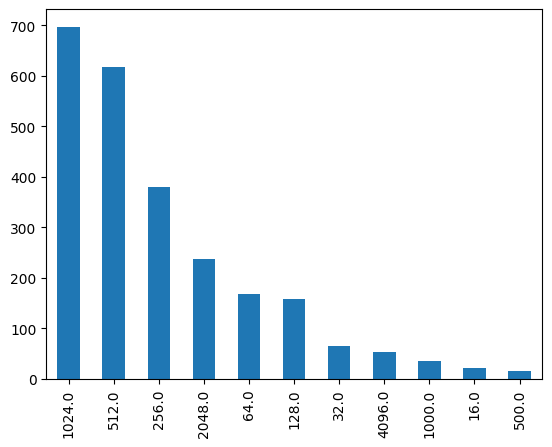

In [ ]:
data["memory"].value_counts().plot(kind = "bar")

We can see the trends here is price tend to increase when memory size increase, except for rom = 192 gb, 500 gb,384 gb

In [ ]:
# Maybe we can cast 1000 gb and 1024 gb into one category
# Maybe we can cast 500 gb and 512 gb into one category
# Maybe we can cast 192 gb and 128 gb into one category
# Maybe we can cast 384 gb and 256 gb into one category

In [ ]:
memory_col = data.loc[:, "memory"]

#Transforms:
memory_col = memory_col.replace(1000,1024)
memory_col = memory_col.replace(500,512)

data.loc[:, "memory"] = memory_col

<ipython-input-34-4011179cd367>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "memory"] = memory_col


<Axes: >

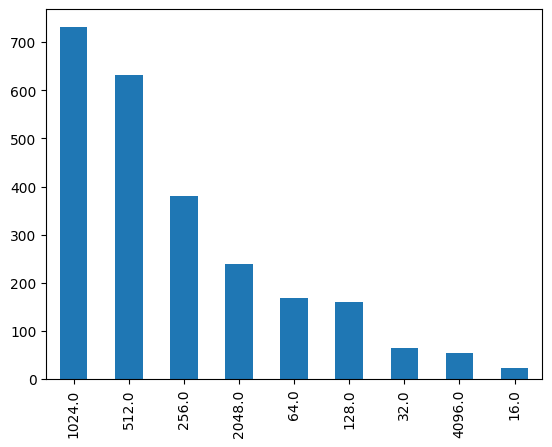

In [ ]:
data["memory"].value_counts().plot(kind = "bar")

##3.4 GPU transforms
I transforms into 5 kinds of gpu:
- arm
- intel
- amd
- nvidia
- other

There a lot of types of gpu. Indeed, there are problems with that:
1. Existence of different data but actually they are the same
2. Spelling error data. Example: 'nvdia' instead of 'nvidia'
3. Error data: Some data actually wrong and does not be relevent

In [ ]:
def gpu_transforms(x):
  if "intel" in x or "i7" in x or "i5" in x or "uhd" in x or "i3" in x or "iris" in x:
    return "intel"
  if "nvidia" in x or "nvdia"in x or "gtx"in x or "rtx" in x:
    return "nvidia"
  if "amd" in x or "radeon" in x or "ryzen5" in x or "a10-8730b" in x:
    return "amd"
  if "apple" in x:
    return "apple"
  return "other"

In [ ]:
trans = data.loc[:, "gpu"].apply(gpu_transforms)

In [ ]:
data.loc[:, "gpu"] = trans

<ipython-input-38-e7f0e8d6e9af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "gpu"] = trans


In [ ]:
data['gpu']

0          amd
2          amd
3       nvidia
4       nvidia
5        intel
         ...  
5519     intel
5542     apple
5551     intel
5554     intel
5556     intel
Name: gpu, Length: 2450, dtype: object

Comment about GPU:
1. Distribution: After transformation, we can see that intel gpu have a large part in gpu distribution.Otherwise, arm and other too small part
2. price of nvidia is the highest. It is easy to understand because nvidia gpu is dedicated gpu
3. amd or intel is integrated gpu -> price is lower than nvidia

##3.3 gpu_description transforms:
1. Actually gpu description transforms has only two kinds:dedicated and integrated. But real data has many different word but same meaning -> trasnform it


In [ ]:
gpu_des = data.loc[:,"graphics_card_description"]

In [ ]:
def gpu_description(x):
  if "dedicated" in x or"nvidia" in x or "gtx" in x or "rtx" in x or "amd radeon pro" in x or "radeon vega 7" in x:
    return "dedicated"
  elif "integrated" in x or "iris" in x or "intel" in x or "amd" in x:
    return "integrated"
  return None

In [ ]:
# Apply transforms
gpu_des = gpu_des.apply(gpu_description)
data.loc[:,"graphics_card_description"] = gpu_des

# drop row has value which is not classified
data = data.dropna()

# Rename columns
data = data.rename(columns={"graphics_card_description" : "gpu_description"})

<ipython-input-42-a1efac66215f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"graphics_card_description"] = gpu_des


<Axes: >

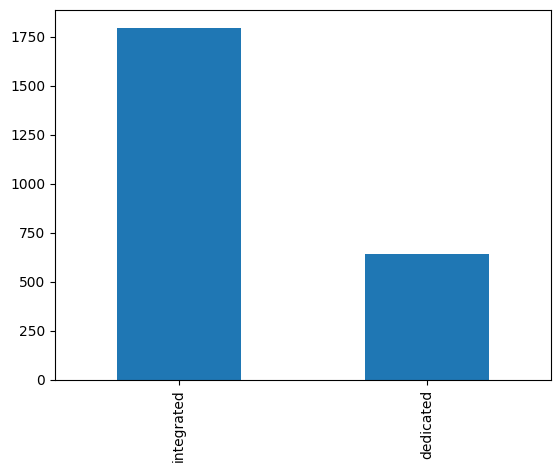

In [ ]:
data.loc[:,"gpu_description"].value_counts().plot(kind = "bar")

##3.4 Ops transforms

In [ ]:
def ops_transforms(x):
  if "windows" in x or "win" in x:
    return "windows"

  if "mac" in x or "os" in x :
    return "mac_os"

  return None

In [ ]:
ops = data.loc[:,"OpSys"]

ops = ops.apply(ops_transforms)
data.loc[:,"OpSys"] = ops

data = data.dropna()

##3.5 Weights

In [ ]:
def convert(weight):
  try:
    if not isinstance(weight, str):
      return weight
    value, unit = weight.split(' ')
    value = float(value)
    if unit.lower() == 'ounces':
      return round(value / 16, 2)
    elif unit == 'kilograms':
      return round(value * 2.2,2)
    elif unit == "grams":
      return round((value/1000) * 2.2,2)
    else:
      return value
  except ValueError:
    return weight

In [ ]:
data['weight'] = data['weight'].apply(convert)

<ipython-input-47-988b0ada8822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weight'] = data['weight'].apply(convert)


In [ ]:
data

,brand,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,gpu_description,OpSys,weight,color,price,ppi
0,acer,15.6,2073600,amd_3,4.1,8.0,128.0,amd,integrated,windows,3.92,silver,292.49,141.211998
2,acer,15.6,2073600,amd_5,4.3,8.0,1024.0,amd,integrated,windows,3.92,steam blue,669.99,141.211998
3,acer,15.6,2073600,intel_i7,3.0,32.0,2048.0,nvidia,dedicated,windows,5.51,black,1869.00,141.211998
4,acer,17.3,2073600,intel_i5,2.5,32.0,1024.0,nvidia,dedicated,windows,9.98,black,1159.00,127.335675
5,acer,14.0,2073600,intel_celeron,1.6,4.0,32.0,intel,integrated,windows,3.42,silver,293.00,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,apple,13.0,4096000,intel_i5,3.1,8.0,512.0,intel,integrated,mac_os,3.02,space gray,744.40,232.221074
5542,apple,15.0,4096000,apple,3.5,8.0,512.0,apple,integrated,mac_os,6.35,silver,1439.95,201.258264
5551,apple,13.0,4096000,intel_i5,2.4,8.0,512.0,intel,integrated,mac_os,3.00,space gray,578.69,232.221074
5554,apple,11.6,1049088,intel_i5,2.7,4.0,128.0,intel,integrated,mac_os,1.10,silver,209.99,135.094211


##3.6 Color Transforms
- blue
- black
- gray
- silver
- gold
- white

In [ ]:
def color_transforms(x):
  if "black" in x or "dark" in x:
    return "black"
  elif "blue" in x:
    return "blue"
  elif "gray" in x or "grey" in x or "gtey" in x:
    return "grey"
  elif "silver" in x or "sliver" in x:
    return "silver"
  elif "gold" in x:
    return "gold"
  elif "white" in x or "light" in x:
    return "white"
  return "other"

<Axes: >

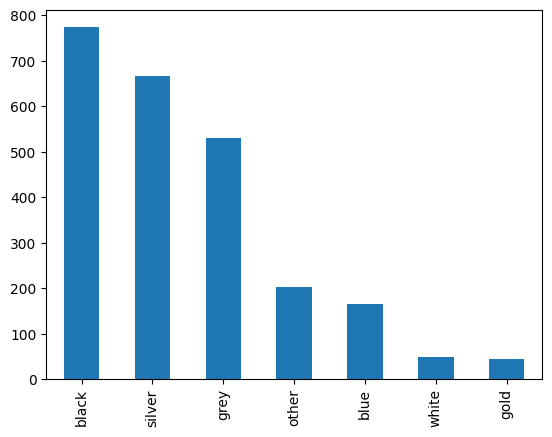

In [ ]:
data.loc[:,"color"].apply(color_transforms).value_counts().plot(kind = "bar")

In [ ]:
# Apply transforms
color = data.loc[:,"color"].apply(color_transforms)
data.loc[:,"color"] = color

#4.Rearrange index and store into a csv file

In [ ]:
# rearrange index:
data.index = range(0, data.index.size)

In [ ]:
data.drop(index=np.where(data['cpu_speed']>100)[0],inplace=True)

In [ ]:
data.head(5)

,brand,screen_size,screen_resolution,cpu,cpu_speed,ram,memory,gpu,gpu_description,OpSys,weight,color,price,ppi
0,acer,15.6,2073600,amd_3,4.1,8.0,128.0,amd,integrated,windows,3.92,silver,292.49,141.211998
1,acer,15.6,2073600,amd_5,4.3,8.0,1024.0,amd,integrated,windows,3.92,blue,669.99,141.211998
2,acer,15.6,2073600,intel_i7,3.0,32.0,2048.0,nvidia,dedicated,windows,5.51,black,1869.00,141.211998
3,acer,17.3,2073600,intel_i5,2.5,32.0,1024.0,nvidia,dedicated,windows,9.98,black,1159.00,127.335675
4,acer,14.0,2073600,intel_celeron,1.6,4.0,32.0,intel,integrated,windows,3.42,silver,293.00,157.350512


In [ ]:
def outlier_visualize(column_name):
    mean=data[column_name].mean()
    std=data[column_name].std()
    x1=mean-3*std
    x2=mean+3*std
    column=data[column_name]
    fig, axes = plt.subplots(1, 2,figsize=(15,5))
    fig.suptitle("Outlier Visualization "+ column_name)
    sns.boxplot(ax=axes[0],x=column)
    axes[0].set_title("Box Plot")
    axes[0].axvline(x=x1)
    axes[0].axvline(x=x2)
    sns.scatterplot(ax=axes[1],x=data['price'],y=column)
    axes[1].set_title("Scatter Plot")
    plt.show()

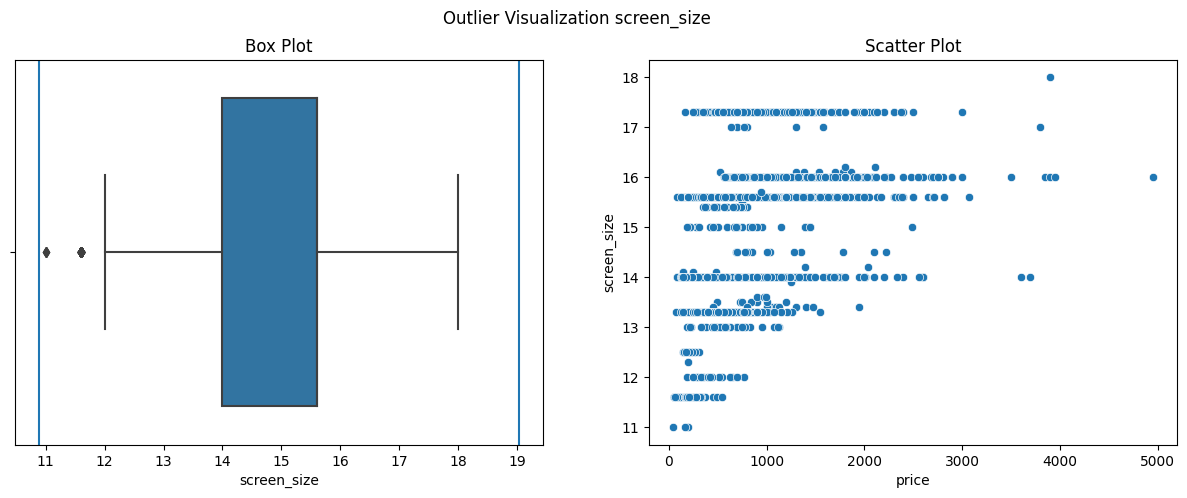

In [ ]:
outlier_visualize('screen_size')

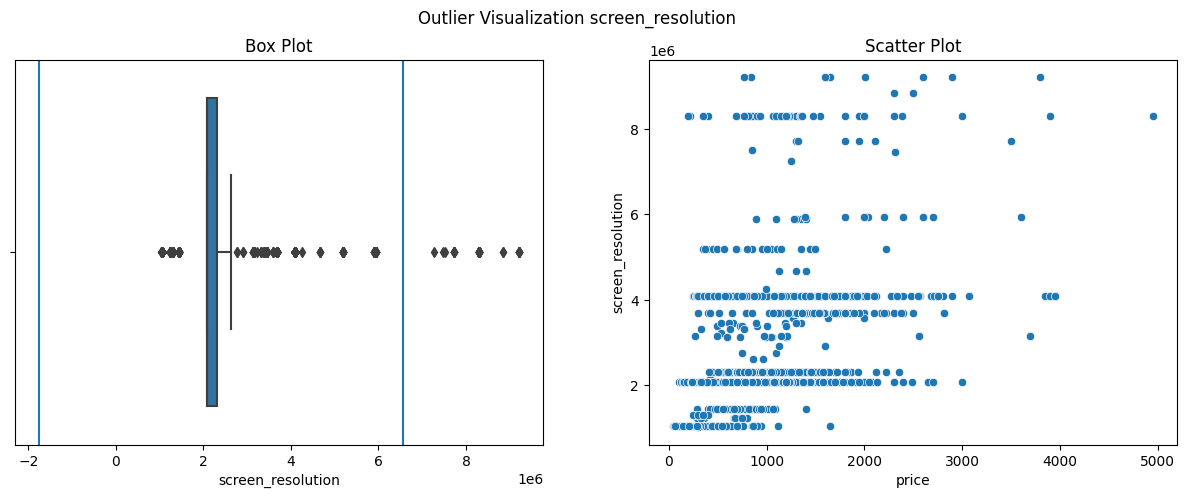

In [ ]:
outlier_visualize('screen_resolution')

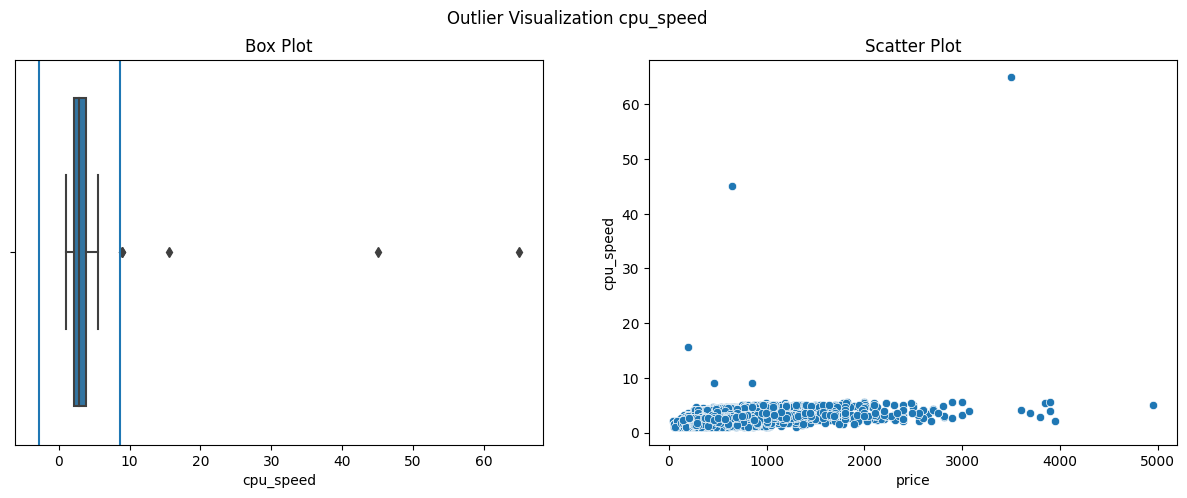

In [ ]:
outlier_visualize('cpu_speed')
# outlier: >40

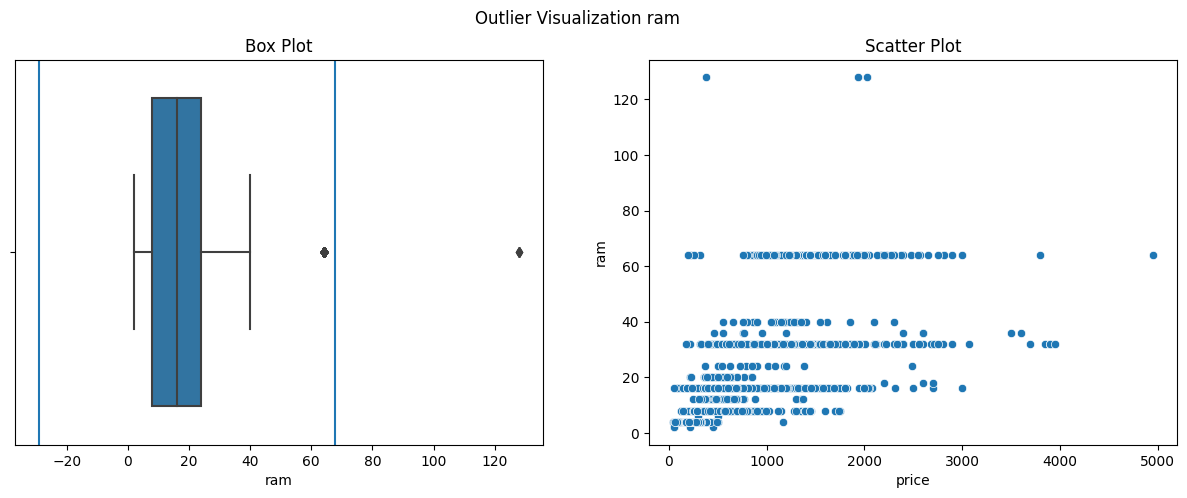

In [ ]:
outlier_visualize('ram')
# outlier: >80

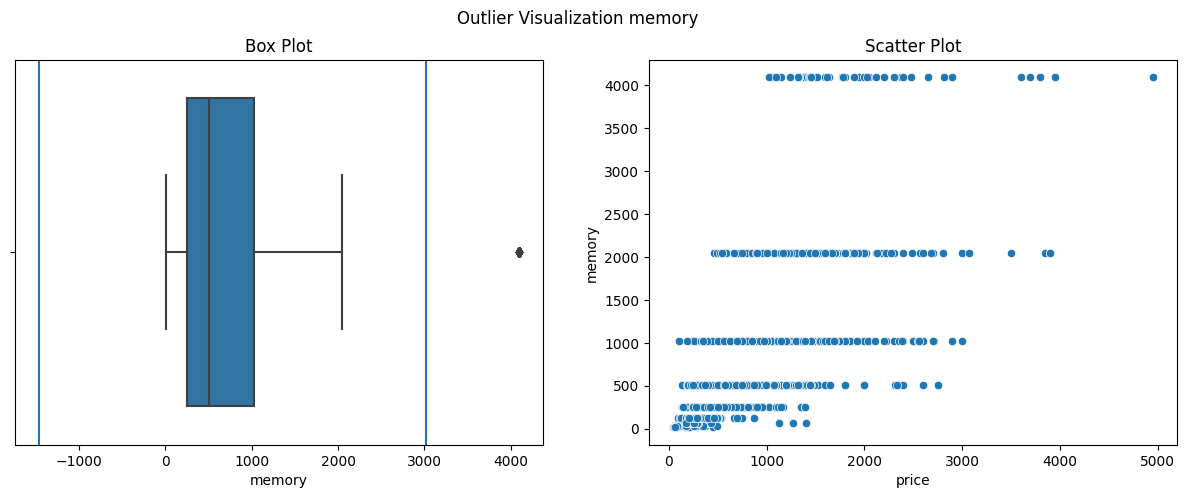

In [ ]:
outlier_visualize('memory')

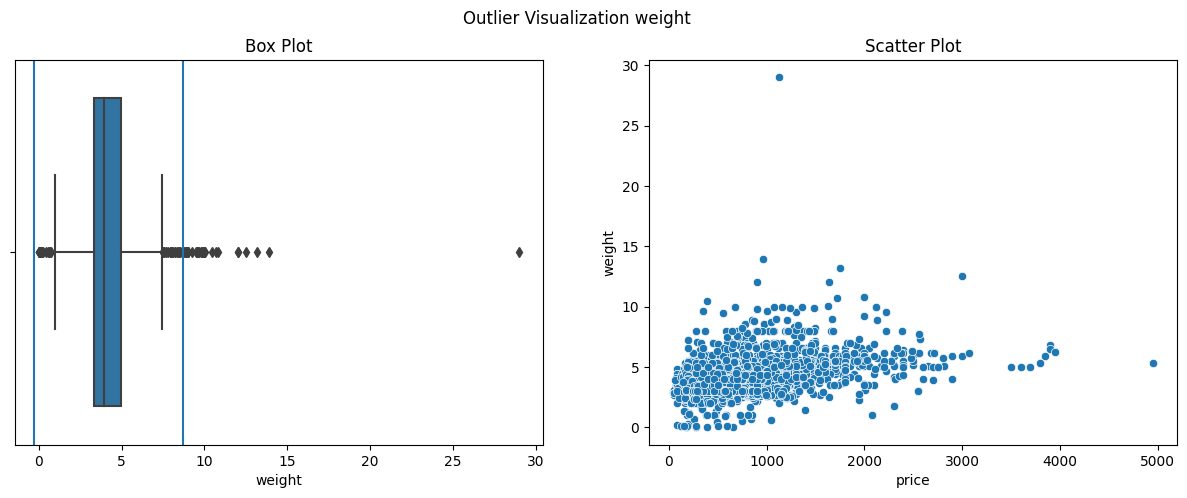

In [ ]:
outlier_visualize('weight')
# outlier: >15

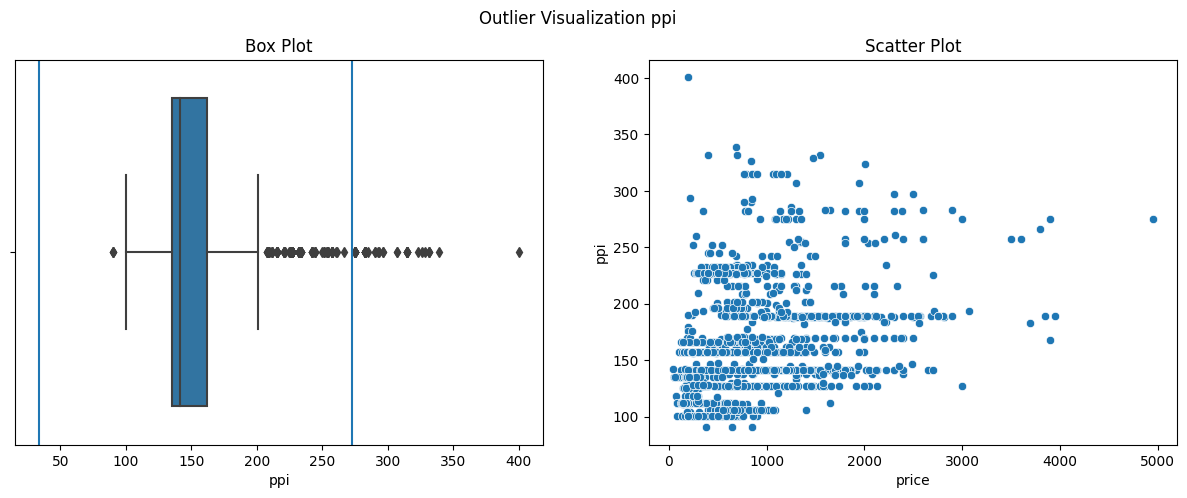

In [ ]:
outlier_visualize('ppi')

In [ ]:
data.drop(index=np.where(data['cpu_speed']>40)[0],inplace=True)
data.drop(index=np.where(data['ram']>80)[0],inplace=True)
data.drop(index=np.where(data['weight']>15)[0],inplace=True)
data.drop(index=np.where(data['ppi']>350)[0],inplace=True)

In [ ]:
data.to_csv('data_preprocses.csv')

In [ ]:
data= pd.get_dummies(data,dtype=int)

In [ ]:
data

,screen_size,screen_resolution,cpu_speed,ram,memory,weight,price,ppi,brand_acer,brand_apple,...,gpu_description_integrated,OpSys_mac_os,OpSys_windows,color_black,color_blue,color_gold,color_grey,color_other,color_silver,color_white
0,15.6,2073600,4.1,8.0,128.0,3.92,292.49,141.211998,1,0,...,1,0,1,0,0,0,0,0,1,0
1,15.6,2073600,4.3,8.0,1024.0,3.92,669.99,141.211998,1,0,...,1,0,1,0,1,0,0,0,0,0
2,15.6,2073600,3.0,32.0,2048.0,5.51,1869.00,141.211998,1,0,...,0,0,1,1,0,0,0,0,0,0
3,17.3,2073600,2.5,32.0,1024.0,9.98,1159.00,127.335675,1,0,...,0,0,1,1,0,0,0,0,0,0
4,14.0,2073600,1.6,4.0,32.0,3.42,293.00,157.350512,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,13.0,4096000,3.1,8.0,512.0,3.02,744.40,232.221074,0,1,...,1,1,0,0,0,0,1,0,0,0
2431,15.0,4096000,3.5,8.0,512.0,6.35,1439.95,201.258264,0,1,...,1,1,0,0,0,0,0,0,1,0
2432,13.0,4096000,2.4,8.0,512.0,3.00,578.69,232.221074,0,1,...,1,1,0,0,0,0,1,0,0,0
2433,11.6,1049088,2.7,4.0,128.0,1.10,209.99,135.094211,0,1,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
data.to_csv('data_final.csv')